To predict the flair, we get the data from the .csv file and save it into a pandas dataframe. The attributes taken into consideration are -

1. Comments
2. Domain
3. Text
4. Title
5. Url
6. Text length, title length and score.
7. Comments+Domain+Text+Title+Url
8. Comments+Title+Url

After doing the elementary data analysis previously, we now move forward.
We create a function for text preprocessing that elimiates punctuations, stopwords and returns the stem.
We then pass each of the attribute mentioned above through our pipeline after splitting it into train and test set.
We then analyse how the different classifiers performed based on the performance metrics. The classification reports and classification matrix tell us what a classifier is good at and what it is bad at, along with the accuracy score.
And then we choose the best one.

The classifiers used are:
1. Multinomial Naive Bayes
2. Support Vector Classifier (SVC)
3. Logistic Regression
4. Decision Tree Classifier
5. Random Forest Classifier
6. KNeighbors Classifier


Performing the necessary imports -


Pandas and numpy to work with dataframe    
Seaborn and matplotlib for visualisation 
nltk for nlp    
(PorterStemmer to be used in text preprocessing)    
Pipeline to automate machine learning workflow       
TfidfTransformer to convert collection of raw documents to a matrix of TF-IDF features    
CountVectorizer to convert collection of text documents to a matrix of token counts      
accuracy_score confusion_matrix and classification_report to get information about model performance    
train_test_split to help us split data easily into training and testing sets 

The classifiers and other imports are done when needed.

In [50]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
import pickle

import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

import string

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('corrected_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22287 entries, 0 to 22286
Data columns (total 9 columns):
Unnamed: 0    22287 non-null int64
author        22287 non-null object
comments      16418 non-null object
domain        22287 non-null object
flair         22287 non-null object
score         22287 non-null int64
text          9125 non-null object
title         22287 non-null object
url           22287 non-null object
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


In [16]:
df.columns

Index(['Unnamed: 0', 'author', 'comments', 'domain', 'flair', 'score', 'text',
       'title', 'url'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Adding text length and title length to dataframe.

In [48]:
df['text_len']=df['text'].apply(str).apply(len)
df['title_len']=df['title'].apply(str).apply(len)

A function for text preprocessing.

In [4]:
def preprocess_text(txt):
    if type(txt)==str:
        nopunc = [str(char) for char in txt if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [ps.stem(word.lower()) for word in nopunc.split() if word.lower() not in nltk.corpus.stopwords.words('english')]

### Working with Multinomial Naive Bayes :

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Creating a pipeline for text features :

In [40]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/classifier
])

to_probe holds the names of the columns we wish to analyse

In [7]:
to_probe=['comments','domain','text','title','url']


For each column in to probe, we train and test the classifier.
We also get the classification report and confusion matrix and accuracy score to help us see how well the performance was.




 This is for comments 

[[454  17  14   2   7  21  47  28   3 145]
 [ 95 131   0   1   1 156  36   6   0 301]
 [106   3 205  11   0  18  77   4   0 131]
 [165  32   8  38   7  86 196  16   1 173]
 [134   0   2   0 256   2   8   3   0 174]
 [ 40  21   3   0   0 344  98   4   1 147]
 [ 26   4   3   2   2  52 473   0   0 164]
 [170   8   2   2  12  14  75 234   5 110]
 [129  39   0   2   3 116  39  10  56 257]
 [ 56   3   0   3   4   7  51   1   0 574]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.33      0.62      0.43       738
  Business/Finance       0.51      0.18      0.27       727
              Food       0.86      0.37      0.52       555
     Non-Political       0.62      0.05      0.10       722
       Photography       0.88      0.44      0.59       579
    Policy/Economy       0.42      0.52      0.47       658
          Politics       0.43      0.65      0.52       726
         Scheduled       

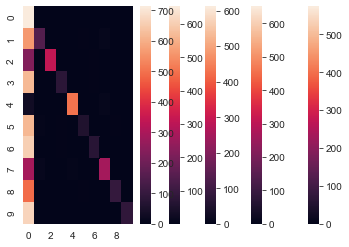

In [25]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("multinomial_f2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    

Comments : accuracy= 0.41  
Domain   : accuracy= 0.35                     
Text     : accuracy= 0.24                                            
Title    : accuracy= 0.65                                               
url      : accuracy= 0.36                                         
                                                 
On seeing the accuracy,precision, recall and f1-score, Title seems a useful feature.

We can now analyse combined features. First we take all the above features together.

In [8]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']




 This is for 

[[544   0   0   0   1   0 201   3   0   0]
 [153  19   0   0   0   1 566   5   0   0]
 [119   0  20   0   0   0 430   0   0   0]
 [156   2   0   0   0   1 536   7   0   0]
 [129   0   0   0  91   0 342   0   0   0]
 [114   6   0   0   0  31 513   0   0   0]
 [110   1   0   0   1   1 599   0   0   0]
 [139   8   0   0   7   0 231 226   0   1]
 [143   3   0   0   0   1 498   3   0   0]
 [132   0   0   0   0   0 575   1   0  17]]
AxesSubplot(0.125,0.125;0.62x0.755)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          AskIndia       0.31      0.73      0.44       749
  Business/Finance       0.49      0.03      0.05       744
              Food       1.00      0.04      0.07       569
     Non-Political       0.00      0.00      0.00       702
       Photography       0.91      0.16      0.27       562
    Policy/Economy       0.89      0.05      0.09       664
          Politics       0.13      0.84      0.23       712
         Scheduled       0.92      0.37      0.53       612
Science/Technology       0.00      0.00      0.00       648
            Sports       0.94      0.02      0.05       725

          accuracy                           0.23      6687
         macro avg       0.56      0.22      0.17      6687
      weighted avg       0.54      0.23      0.17      6687

accuracy :  0.23134439958127712


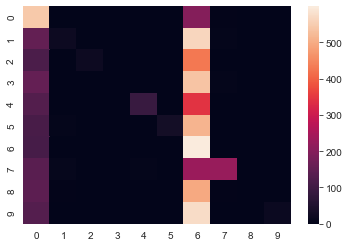

In [12]:
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("multinomial_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

We see that we do not get satisfactory results.

We now take only the features that gave us relatively better outcomes, i.e., Title, url and comments.

In [41]:
comb_feats=df['comments']+df['title']+df['url']




 This is for 

[[462 120  17   3   5  13  60  14   2   9]
 [ 90 459   2   1   2  96  34   4   2   1]
 [ 98 144 232   1   2  14  55   1   0   1]
 [209 194   6  26   9  79 209  12   4  12]
 [ 97 192   1   0 281   0   7   4   0   0]
 [ 43 172   3   0   0 359  88   2   1   0]
 [ 25 166   1   2   2  63 474   1   0   3]
 [136 131   1   0   8   9  64 304   0   0]
 [148 285   0   2   2  78  53   6  69   3]
 [ 64 207   0   1   2   2  29   3   0 389]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.34      0.66      0.44       705
  Business/Finance       0.22      0.66      0.33       691
              Food       0.88      0.42      0.57       548
     Non-Political       0.72      0.03      0.07       760
       Photography       0.90      0.48      0.63       582
    Policy/Economy       0.50      0.54      0.52       668
          Politics       0.44      0.64      0.52       737
         Scheduled       0.87     

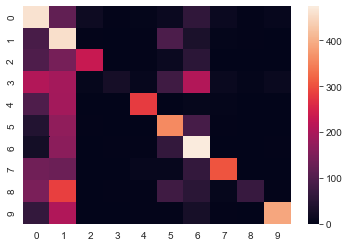

In [42]:
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("multinomial_f2"+"comb_2"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

The results are less better than with title alone. 
Now we see other features, text length, score and title length seperately.

In [83]:
to_probe=['text_len','title_len','score']

In [84]:
pipeline = Pipeline([
    ('classifier', MultinomialNB()),  
])




 This is for text_len 

[[  0   0   0   0   0   0 737   0   0   0]
 [  0   0   0   0   0   0 759   0   0   0]
 [  0   0   0   0   0   0 562   0   0   0]
 [  0   0   0   0   0   0 737   0   0   0]
 [  0   0   0   0   0   0 540   0   0   0]
 [  0   0   0   0   0   0 656   0   0   0]
 [  0   0   0   0   0   0 713   0   0   0]
 [  0   0   0   0   0   0 599   0   0   0]
 [  0   0   0   0   0   0 634   0   0   0]
 [  0   0   0   0   0   0 750   0   0   0]]
AxesSubplot(0.125,0.125;0.62x0.755)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          AskIndia       0.00      0.00      0.00       737
  Business/Finance       0.00      0.00      0.00       759
              Food       0.00      0.00      0.00       562
     Non-Political       0.00      0.00      0.00       737
       Photography       0.00      0.00      0.00       540
    Policy/Economy       0.00      0.00      0.00       656
          Politics       0.11      1.00      0.19       713
         Scheduled       0.00      0.00      0.00       599
Science/Technology       0.00      0.00      0.00       634
            Sports       0.00      0.00      0.00       750

          accuracy                           0.11      6687
         macro avg       0.01      0.10      0.02      6687
      weighted avg       0.01      0.11      0.02      6687

accuracy :  0.1066247943771497



 This is for title_len 

[[  0 738   0   0   0   0   0   0   0   0]
 [  0 715   0   0   0   0   0   0   0   0]
 [  0 554   

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          AskIndia       0.00      0.00      0.00       738
  Business/Finance       0.11      1.00      0.19       715
              Food       0.00      0.00      0.00       554
     Non-Political       0.00      0.00      0.00       702
       Photography       0.00      0.00      0.00       562
    Policy/Economy       0.00      0.00      0.00       673
          Politics       0.00      0.00      0.00       759
         Scheduled       0.00      0.00      0.00       604
Science/Technology       0.00      0.00      0.00       666
            Sports       0.00      0.00      0.00       714

          accuracy                           0.11      6687
         macro avg       0.01      0.10      0.02      6687
      weighted avg       0.01      0.11      0.02      6687

accuracy :  0.10692388215941379



 This is for score 

[[730   0   0   0   0   0   0   0   0   0]
 [750   0   0   0   0   0   0   0   0   0]
 [603   0   0  

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          AskIndia       0.11      1.00      0.20       730
  Business/Finance       0.00      0.00      0.00       750
              Food       0.00      0.00      0.00       603
     Non-Political       0.00      0.00      0.00       724
       Photography       0.00      0.00      0.00       554
    Policy/Economy       0.00      0.00      0.00       660
          Politics       0.00      0.00      0.00       753
         Scheduled       0.00      0.00      0.00       589
Science/Technology       0.00      0.00      0.00       601
            Sports       0.00      0.00      0.00       723

          accuracy                           0.11      6687
         macro avg       0.01      0.10      0.02      6687
      weighted avg       0.01      0.11      0.02      6687

accuracy :  0.10916704052639449


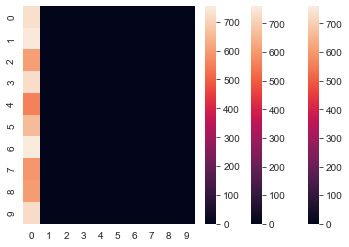

In [95]:
for x in to_probe:
    X=df[x].fillna(value=0)
    y=df['flair']
    MNB=MultinomialNB()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    MNB.fit(np.array(X_train).reshape(-1,1),y_train)
    save_classifier=open("multinomial_f2"+x+".pickle","wb")
    pickle.dump(MNB,save_classifier)
    save_classifier.close()
    predictions = MNB.predict(np.array(X_test).reshape(-1,1))
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))

The results are highly dissatisfactory, so we won't be using these any further. So we combine features to see if they'd yield any result.

In [99]:
lst=['title_len','score','text_len']




 This is for score 

[[ 30  17  44   0   6 550   9  18   2  25]
 [ 25  21  63   0   6 544  20  31   5  16]
 [ 12  20 104   0   8 338  17  17   5  26]
 [ 17  18  56   1   8 585  20  29   4  27]
 [ 27  14  94   0   5 411  17   8   2  24]
 [ 17  24  46   0  13 449  11  27   7  28]
 [ 26  22 106   2  12 529  26  11   4  21]
 [ 31  17  75   0   8 408  28  18   5  26]
 [ 16  14  48   0  11 453  21  18   3  32]
 [ 17   8  82   0   9 542  14  26   4  26]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.14      0.04      0.07       701
  Business/Finance       0.12      0.03      0.05       731
              Food       0.14      0.19      0.16       547
     Non-Political       0.33      0.00      0.00       765
       Photography       0.06      0.01      0.01       602
    Policy/Economy       0.09      0.72      0.17       622
          Politics       0.14      0.03      0.06       759
         Scheduled       0.0

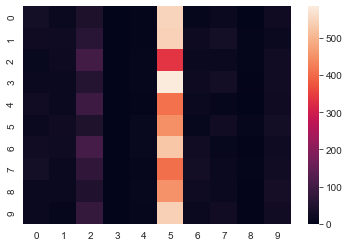

In [100]:
X=df[lst].fillna(value=0)
y=df['flair']
MNB=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
MNB.fit(X_train,y_train)
save_classifier=open("multinomial_f2"+"num"+".pickle","wb")
pickle.dump(MNB,save_classifier)
save_classifier.close()
predictions = MNB.predict(X_test)
print('\n\n\n This is for',x,'\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))

Hardly any improvement.

### Working with Support Vector Classifier

Import the SVC                      
Import GridSearchCV to combine the estimator with a grid search preamble to tune hyper-parameters.                  
Set the paramgrid                     
And then we create the pipeline

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [23]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', GridSearchCV(SVC(),param_grid,refit=True,verbose=2)),  
])

In [116]:
to_probe=['comments','domain','text','title','url']

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 7.4min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.4min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 7.4min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.4min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.1min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.5min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 3.8min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 3.3min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 3.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total= 3.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.9min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.8min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 3.0min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 3.0min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.9min
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total= 2.4min
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 326.0min finished





 This is for comments 

[[470 126  13  57   0  11  11  38  13   7]
 [ 46 517   7  37   0  65   6   8  33   2]
 [ 30 142 337  22   2  12   3   5   4   0]
 [122 199   8 259   4  47  56  23  25  10]
 [  4 171   2   2 373   1   0   0   0   0]
 [ 41 206   4  40   0 327  46   7  23   3]
 [ 32 161   3  80   0  50 410   5   3   2]
 [ 44 126   3  25   9   9   8 372   1   2]
 [ 62 268   1  35   2  25   4   5 213   2]
 [ 35 209   0  34   1   3   7   7   3 399]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.53      0.63      0.58       746
  Business/Finance       0.24      0.72      0.36       721
              Food       0.89      0.61      0.72       557
     Non-Political       0.44      0.34      0.39       753
       Photography       0.95      0.67      0.79       553
    Policy/Economy       0.59      0.47      0.52       697
          Politics       0.74      0.55      0.63       746
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   4.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   4.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   4.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   4.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   4.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   5.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   5.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   5.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  12.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  11.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  10.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  10.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  10.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  10.9s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  11.1s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.8min finished





 This is for domain 

[[678   0   1  26   9   0   4   0   2  25]
 [167 206   4  64  20 155  59   0  46  32]
 [163  10  67  72  78  19  87   0   5  56]
 [171  31  12 149  42  36 157   0  13  81]
 [228   4   0  38 230   1  13   0   1  20]
 [ 78  55   7  41  10 252 187   0  20  37]
 [101  17   7  79  26  45 406   0   8  56]
 [485   3   5  12  11   5  44  28   2   4]
 [149  40   7 104  22  53  93   3 128  56]
 [144  13  11 103  29  26 162   1   8 222]]
AxesSubplot(0.125,0.125;0.496x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.29      0.91      0.44       745
  Business/Finance       0.54      0.27      0.36       753
              Food       0.55      0.12      0.20       557
     Non-Political       0.22      0.22      0.22       692
       Photography       0.48      0.43      0.45       535
    Policy/Economy       0.43      0.37      0.39       687
          Politics       0.33      0.54      0.41       745
         Scheduled       0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  42.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  44.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  43.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  44.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  43.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  49.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  47.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  48.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  50.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  41.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  41.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  40.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  41.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  42.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  36.6s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 57.5min finished





 This is for text 

[[466   5  11  27   2  63 126   8   9   6]
 [ 46  66   0   0   0 103 502  11   1   0]
 [ 40   1  85   0   0  49 371   0   0   0]
 [ 79   2   3  38   0  87 478   6   3   0]
 [ 17   0   0   0 230  37 277   0   0   0]
 [ 20  14   0   3   0 161 498   0   3   1]
 [ 36   1   7   2   0  56 606   6   2   0]
 [ 31  13   1   7   9  34 188 351   3   0]
 [ 48   4   0   6   0  75 450   5  59   3]
 [ 32   1   0   1   0  85 521   3   0  86]]
AxesSubplot(0.125,0.125;0.3968x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.57      0.64      0.61       723
  Business/Finance       0.62      0.09      0.16       729
              Food       0.79      0.16      0.26       546
     Non-Political       0.45      0.05      0.10       696
       Photography       0.95      0.41      0.57       561
    Policy/Economy       0.21      0.23      0.22       700
          Politics       0.15      0.85      0.26       716
         Scheduled       0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.0min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.0min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.0min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.0min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  53.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  50.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  27.2s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  24.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  25.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  26.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  28.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  31.5s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  24.9s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 39.3min finished





 This is for title 

[[462  37   7  82   3  27  22   3  52  21]
 [ 47 452   6  46   1  80  15  18  70   8]
 [ 38  10 435  40   0   8  13   1   2   4]
 [ 80  45   4 408   5  60  55   4  38  22]
 [  9   3   2   7 542   2   0   1   2   0]
 [ 37  80   9  63   0 397  73   0  32   2]
 [ 27  19   6  99   0  63 458   3  16   5]
 [ 14  17   1  11  16   3   5 538   5   3]
 [ 46  51   2  71   2  45  14   5 392   6]
 [ 35   9   1  44   0  13  14   3   3 630]]
AxesSubplot(0.125,0.125;0.31744x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.58      0.65      0.61       716
  Business/Finance       0.63      0.61      0.62       743
              Food       0.92      0.79      0.85       551
     Non-Political       0.47      0.57      0.51       721
       Photography       0.95      0.95      0.95       568
    Policy/Economy       0.57      0.57      0.57       693
          Politics       0.68      0.66      0.67       696
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   7.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   7.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   7.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   7.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   7.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   7.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   6.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   7.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   6.8s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   8.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   8.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   8.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   8.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   7.8s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   8.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.9min finished





 This is for url 

[[ 84   1   0   0   2   0 680   1   2   0]
 [  0 139   0   1   1   9 526   6   3   0]
 [  2   0 317   0   0   0 256   0   0   0]
 [  0   2   0  90   0   0 637   0   1   0]
 [  0   0   1   0 512   0  34   7   0   0]
 [  1  13   0   4   0  68 599   0   2   0]
 [  0   0   0   1   0   0 722   1   0   0]
 [  1  10   1   0   7   0 256 298   0   0]
 [  0   5   0   2   0   9 520   0  96   0]
 [  1   0   0   0   0   2 650   1   0 103]]
AxesSubplot(0.125,0.125;0.253952x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.94      0.11      0.20       770
  Business/Finance       0.82      0.20      0.33       685
              Food       0.99      0.55      0.71       575
     Non-Political       0.92      0.12      0.22       730
       Photography       0.98      0.92      0.95       554
    Policy/Economy       0.77      0.10      0.18       687
          Politics       0.15      1.00      0.26       724
         Scheduled       0

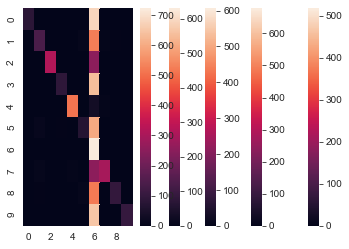

In [117]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("svc_f2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    

Comments : accuracy= 0.54  
Domain   : accuracy= 0.35                     
Text     : accuracy= 0.32                                          
Title    : accuracy= 0.70                                               
url      : accuracy= 0.36

Here too, title emerges as the best feature.

Now, we take the combined features.

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.2min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total= 2.7min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.3min
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total= 1.9min
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 158.6min finished





 This is for 

[[433   7  12  18   1  11 200   9  17   6]
 [ 28 104   1   1   0  15 570   6  10   1]
 [ 23   0 121   2   0   0 439   0   0   0]
 [ 81   6   1  61   1   6 550   8   8   1]
 [  4   0   0   0 210   0 353   0   0   0]
 [ 25  13   0   2   0  84 528   3  12   0]
 [ 23   2   2   5   0  16 679   0   3   0]
 [ 17   6   0   2   7   5 239 337   1   2]
 [ 24   9   0   5   0   6 465   0  94   3]
 [ 31   0   0   2   0   1 586   0   0 123]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.63      0.61      0.62       714
  Business/Finance       0.71      0.14      0.24       736
              Food       0.88      0.21      0.34       585
     Non-Political       0.62      0.08      0.15       723
       Photography       0.96      0.37      0.53       567
    Policy/Economy       0.58      0.13      0.21       667
          Politics       0.15      0.93      0.25       730
         Scheduled       0.93     

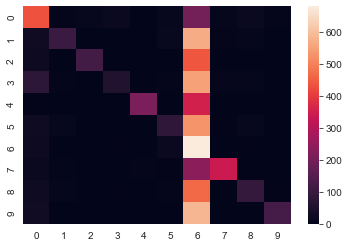

In [26]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("svc_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

The result is not better than using title as feature.

Now, we use the top three features that gave us better results, i.e., comments,title and url.

into pipeline
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 7.8min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 7.8min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.8min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.8min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 7.9min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 7.8min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 7.8min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 6.8min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total= 3.3min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.9min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.9min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 2.9min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 3.1min
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total= 3.3min
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total= 2.5min
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 350.9min finished


out of pipeline



 This is for 

[[444 142  20  45   1  12  14  12  13   5]
 [ 53 541   2  33   1  59   4   2  30   1]
 [ 23 138 352  18   2   1   5   0   2   0]
 [119 182   7 290   0  46  50   6  26  10]
 [  2 150   0   3 386   0   0   0   0   0]
 [ 44 197   6  43   0 344  41   4  12   3]
 [ 37 163   8  68   0  45 424   1   3   1]
 [ 25 113   2   9   8   0   2 442   3   1]
 [ 56 276   2  38   2  37   9   0 216   1]
 [ 48 238   1  33   1   3   9   3   2 411]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.52      0.63      0.57       708
  Business/Finance       0.25      0.75      0.38       726
              Food       0.88      0.65      0.75       541
     Non-Political       0.50      0.39      0.44       736
       Photography       0.96      0.71      0.82       541
    Policy/Economy       0.63      0.50      0.55       694
          Politics       0.76      0.57      0.65       750
         Scheduled

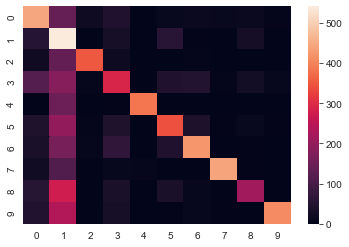

In [33]:
comb_feats=df['comments']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('into pipeline')
pipeline.fit(X_train,y_train)
print('out of pipeline')
save_classifier=open("svc_f2"+"comb2_correct"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))

This is still not better than using the title alone.

Now we analyse the text_len, title_len and score.

In [46]:
pipeline = Pipeline([  # integer counts to weighted TF-IDF scores
    ('classifier', GridSearchCV(SVC(),param_grid,refit=True,verbose=2)),  
])

In [45]:
lst=['text_len','title_len','score']

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  21.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  33.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  42.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  38.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  43.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  36.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  36.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  36.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  16.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  18.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  18.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  19.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  18.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  17.9s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  45.2s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 41.5min finished





 This is for 

[[455  57  14  27  13  28  28  14  15  35]
 [ 90 299  25  61  18  80  56  12  44  82]
 [ 87  75 193  54  13  33  54   8  25  26]
 [145 113  27 120  33  55  93  11  45  69]
 [ 24  46   7  13 406  12  11  11  13  15]
 [133 114  30  69  21  96  87  10  39  74]
 [120 112  22  82  24  48 169  21  34  87]
 [106  48  15  10  12  11  19 363  11  31]
 [105 136  30  63  21  73  60   7  87  73]
 [120 137  30  70  17  52 115  12  38 133]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.33      0.66      0.44       686
  Business/Finance       0.26      0.39      0.31       767
              Food       0.49      0.34      0.40       568
     Non-Political       0.21      0.17      0.19       711
       Photography       0.70      0.73      0.71       558
    Policy/Economy       0.20      0.14      0.17       673
          Politics       0.24      0.24      0.24       719
         Scheduled       0.77     

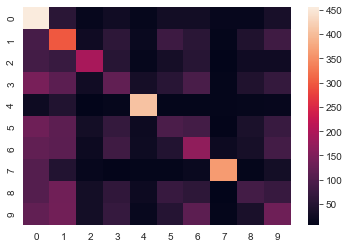

In [49]:
X=df[lst].fillna(value=0)
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("svc_f2"+"num"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))

This gives better results from the same features than the previous classifier used, but still not as good as title.

### Working with Logistic Regression

We import the classifier and then we follow the same steps that we followed with the previous classifier.

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
param_grid = {'max_iter':[1,10,100,1000,5000,10000]} 

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  
    ('tfidf', TfidfTransformer()),  
    ('scaled',StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)),
])

In [55]:
to_probe=['comments','domain','text','title','url']

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_iter=1 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  22.3s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  22.1s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  22.3s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  22.6s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  22.5s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 4.3min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 3.9min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 4.1min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 5.5min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 6.6min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=11.0min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=11.0min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=12.2min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=10.2min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 9.8min
[CV] max_iter=10000 ..................................................
[CV] ................................... max_iter=10000, total=10.6min
[CV] max_iter=10000 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 127.3min finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for comments 

[[337 162  35  40  15  12  20  43  35  23]
 [ 43 490   7  22   5  58  10   6  44   7]
 [ 41 144 319  23   2   1  11   4  12   6]
 [ 82 214  28 195  13  54  64  29  45  25]
 [  4 179   2   0 365   0   0   0   0   0]
 [ 28 208  13  32   4 297  43   8  37  11]
 [ 27 197  16  44   4  71 335  12   5  19]
 [ 48 132  10  22  15   5  11 353  10   8]
 [ 45 294   4  19   3  43  11   6 205  10]
 [ 17 245   3  17   4   6  15   8   9 422]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.50      0.47      0.48       722
  Business/Finance       0.22      0.71      0.33       692
              Food       0.73      0.57      0.64       563
     Non-Political       0.47      0.26      0.34       749
       Photography       0.85      0.66      0.74       550
    Policy/Economy       0.54      0.44      0.48       681
          Politics       0.64      0.46      0.54       730
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-l

[CV] ...................................... max_iter=10, total=   0.1s
[CV] max_iter=10 .....................................................
[CV] ...................................... max_iter=10, total=   0.1s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-l

[CV] ...................................... max_iter=10, total=   0.1s
[CV] max_iter=10 .....................................................
[CV] ...................................... max_iter=10, total=   0.1s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.1s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   0.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   0.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   0.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   0.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   0.9s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   2.2s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   1.8s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   2.0s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   1.9s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   1.9s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=   2.2s
[CV] max_iter=5000 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.9s finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for domain 

[[676   0   2  24   3   0   6   1   3  28]
 [148 182   7  69  18 168  61   0  40  35]
 [148  12 106  80  38  26  88   3   8  46]
 [161  27  38 143  18  51 152   1  15  73]
 [256   3  50  38 215   1   9   2   5  12]
 [ 82  35  10  39   8 261 161   3  14  34]
 [ 80  10  16  81  25  71 361   4   6  55]
 [494   1   3  24  11   5  37  36   1   6]
 [142  15  14 128  12  75  88   2 142  48]
 [146   4  21 111  17  24 173   1   7 247]]
AxesSubplot(0.125,0.125;0.496x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.29      0.91      0.44       743
  Business/Finance       0.63      0.25      0.36       728
              Food       0.40      0.19      0.26       555
     Non-Political       0.19      0.21      0.20       679
       Photography       0.59      0.36      0.45       591
    Policy/Economy       0.38      0.40      0.39       647
          Politics       0.32      0.51      0.39       709
         Scheduled       0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.7s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   5.0s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.9s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   5.0s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.9s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  47.8s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  48.1s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  49.0s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  54.9s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  50.6s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 1.3min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 1.7min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 1.5min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 1.6min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 1.6min
[CV] max_iter=10000 ..................................................
[CV] ................................... max_iter=10000, total= 1.3min
[CV] max_iter=10000 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 19.9min finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for text 

[[343  39   9  22  11  71 142  28  27  12]
 [ 49  89   0   4   1  72 488  16   2   0]
 [ 32   4 106   1   1  51 376  11   2   0]
 [ 48  11   1  51   2  95 498  16   6   3]
 [ 19   0   0   0 209  37 289   4   1   0]
 [ 20  24   1   0   0 145 466  11   5   1]
 [ 18  10   0   5   1  65 592   3   2   4]
 [ 36  17   3   3  11  34 168 362   2   0]
 [ 62   2   2   3   1  83 401   8  67   3]
 [ 25   1   1   1   0  76 556   5   6  76]]
AxesSubplot(0.125,0.125;0.3968x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.53      0.49      0.51       704
  Business/Finance       0.45      0.12      0.19       721
              Food       0.86      0.18      0.30       584
     Non-Political       0.57      0.07      0.12       731
       Photography       0.88      0.37      0.53       559
    Policy/Economy       0.20      0.22      0.21       673
          Politics       0.15      0.85      0.25       700
         Scheduled       0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-l

[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.4s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.4s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.4s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.4s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.4s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   2.8s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   2.8s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   2.8s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   2.8s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   3.0s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  30.1s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  30.5s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  30.3s
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total=  30.4s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  29.5s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  31.0s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  31.8s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  30.4s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  32.5s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  28.7s
[CV] max_iter=10000 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.2min finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for title 

[[348  64  33  58  19  50  45  10  50  41]
 [ 43 407  17  24   6  98  38  11  55  21]
 [ 30  11 466   7   7  10   8   6   7  12]
 [ 71  67  21 226  26  76 104  13  45  67]
 [ 20  12   4   4 514   0   3   6   9   3]
 [ 27  89  11  32   6 365  78   5  27  18]
 [ 15  18  14  45   3  60 548   4  10  30]
 [ 19  25   3  18  18   8  22 467   7   9]
 [ 59  72   9  28   4  64  32   4 344  32]
 [ 20   6   9   6   2   6  32   6   9 649]]
AxesSubplot(0.125,0.125;0.31744x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.53      0.48      0.51       718
  Business/Finance       0.53      0.57      0.55       720
              Food       0.79      0.83      0.81       564
     Non-Political       0.50      0.32      0.39       716
       Photography       0.85      0.89      0.87       575
    Policy/Economy       0.50      0.55      0.52       658
          Politics       0.60      0.73      0.66       747
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.6s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.4s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.3s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.6s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.3s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   4.5s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   9.6s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  10.0s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  10.4s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   8.7s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  10.3s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=   9.6s
[CV] max_iter=5000 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for url 

[[ 75   3   1   0   0   0 650   0   1   0]
 [  0 139   0   3   0   6 561   6   4   1]
 [  0   0 322   0   1   0 252   0   0   0]
 [  0   0   0  93   0   1 604   0   1   0]
 [  2   0   0   0 521   0  31   6   0   0]
 [  0  10   0   0   0  58 570   0  10   2]
 [  0   0   5   2   0   0 716   1   0   0]
 [  2  13   1   0   6   0 292 307   1   2]
 [  0   4   0   1   0   2 527   0 113   0]
 [  1   0   0   0   0   1 664   0   0  92]]
AxesSubplot(0.125,0.125;0.253952x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.94      0.10      0.19       730
  Business/Finance       0.82      0.19      0.31       720
              Food       0.98      0.56      0.71       575
     Non-Political       0.94      0.13      0.23       699
       Photography       0.99      0.93      0.96       560
    Policy/Economy       0.85      0.09      0.16       650
          Politics       0.15      0.99      0.26       724
         Scheduled       0

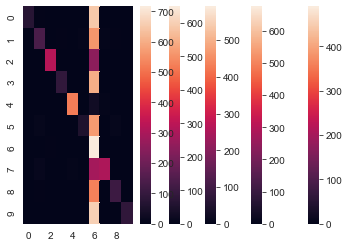

In [36]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("logisticreg_f2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    

Comments : accuracy= 0.49    
Domain   : accuracy= 0.35                     
Text     : accuracy= 0.30                                            
Title    : accuracy= 0.64                                               
url      : accuracy= 0.36 

The results are not as good as SVC . Now we see the combined features.

In [56]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  
    ('tfidf', TfidfTransformer()),  
    ('scaled',StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(LogisticRegression(dual=False),param_grid,refit=True,verbose=2)),
])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_iter=1 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ....................................... max_iter=1, total=   1.0s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.8s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.8s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   3.2s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.9s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.5s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.3s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.2s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.4s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   2.2s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  20.4s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  20.5s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  20.6s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  21.2s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=  21.8s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total= 2.8min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 4.8min
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total= 3.4min
[CV] max_iter=1000 ...................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................................... max_iter=1000, total= 4.7min
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total= 3.0min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 3.7min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 4.7min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 3.4min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 5.4min
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total= 3.1min
[CV] max_iter=10000 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 56.3min finished





 This is for 

[[362  17  22  17  13  21 232  26  23  23]
 [ 26  89   0   6   1  22 570   5  10   3]
 [ 14   4 109   2   5   0 430   5   0   1]
 [ 56   8   3  39   4   8 570  15  11  10]
 [  0   3   0   0 209   0 341   6   0   0]
 [ 18  20   1   3   1  92 506   4   9   4]
 [  8   8   5   1   0  15 679   4   3   4]
 [ 27  13   4   1   6   2 224 307   5   4]
 [ 36   8   3   0   1  15 486  10  66   5]
 [ 18   1   2   3   0   3 593   6   4 108]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.64      0.48      0.55       756
  Business/Finance       0.52      0.12      0.20       732
              Food       0.73      0.19      0.30       570
     Non-Political       0.54      0.05      0.10       724
       Photography       0.87      0.37      0.52       559
    Policy/Economy       0.52      0.14      0.22       658
          Politics       0.15      0.93      0.25       727
         Scheduled       0.79     

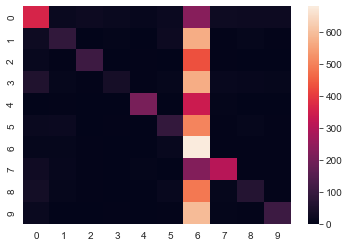

In [58]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("logistic_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_iter=1 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ....................................... max_iter=1, total=   0.3s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.7s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.8s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.7s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.7s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.8s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   6.1s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   6.2s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   6.0s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   6.0s
[CV] max_iter=100 ....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................................... max_iter=100, total=   6.2s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  40.8s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  38.3s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  32.7s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  38.0s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=  46.7s
[CV] max_iter=5000 ...................................................
[CV] .................................... max_iter=5000, total=  39.8s
[CV] max_iter=5000 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.4min finished
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)





 This is for 

[[461  40  19  63   8  18  24  16  34  22]
 [ 67 442  13  35   7  79  28  27  52  13]
 [ 43  11 455  20   6   7  20   0   7   8]
 [121  55  25 226  24  71 105  18  54  44]
 [ 19   0   3   5 553   0   0   3   2   0]
 [ 37  79  10  45   7 335  76   3  42  17]
 [ 49  27  17  54  10  63 426  11  19  22]
 [ 13  22   5   4  14   4   4 551  10   2]
 [ 63  57   4  23   6  55  27  11 364  25]
 [ 29  12   7  24   2  19  23   0  12 573]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.51      0.65      0.57       705
  Business/Finance       0.59      0.58      0.59       763
              Food       0.82      0.79      0.80       577
     Non-Political       0.45      0.30      0.36       743
       Photography       0.87      0.95      0.91       585
    Policy/Economy       0.51      0.51      0.51       651
          Politics       0.58      0.61      0.60       698
         Scheduled       0.86     

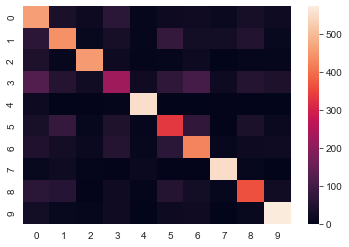

In [59]:
comb_feats=df['domain']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("logistic_f2"+"comb2"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))

This gives better results than title alone using the same classifier but not as good as title in SVC.

In [47]:
lst=['text_len','title_len','score']
param_grid = {'max_iter':[1,10,100,1000,5000,10000]} 

In [48]:
pipeline = Pipeline([
    ('scaled',StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(LogisticRegression(dual=False),param_grid,refit=True,verbose=2)),
])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=1 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

[CV] ....................................... max_iter=1, total=   0.2s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=1 ......................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-l

[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=1 ......................................................
[CV] ....................................... max_iter=1, total=   0.1s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.2s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.3s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.2s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.2s
[CV] max_iter=10 .....................................................


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ...................................... max_iter=10, total=   0.2s
[CV] max_iter=100 ....................................................
[CV] ..................................... max_iter=100, total=   0.5s
[CV] max_iter=100 ....................................................
[CV] ..................................... max_iter=100, total=   0.5s
[CV] max_iter=100 ....................................................
[CV] ..................................... max_iter=100, total=   0.5s
[CV] max_iter=100 ....................................................
[CV] ..................................... max_iter=100, total=   0.5s
[CV] max_iter=100 ....................................................
[CV] ..................................... max_iter=100, total=   0.5s
[CV] max_iter=1000 ...................................................
[CV] .................................... max_iter=1000, total=   0.5s
[CV] max_iter=1000 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   13.0s finished





 This is for 

[[ 18 275   0 279   0  52 116   2   0  10]
 [  3  71   0 465   3   8 136  23   0  15]
 [  6  59   4 256  17   8 160   1   1  39]
 [  4  52   0 428   5  32 178   1   0  30]
 [  8 164   1 208  13  27  90   4   0  40]
 [  2  43   0 374   0  25 190   7   1  21]
 [  7  38   3 401   9  20 239   4   1  24]
 [ 12 273   0 146   6  16 115  10   0   6]
 [  3  76   1 370   1  19 131   7   0  25]
 [  6  53   4 441   7  12 185   1   0  40]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.26      0.02      0.04       752
  Business/Finance       0.06      0.10      0.08       724
              Food       0.31      0.01      0.01       551
     Non-Political       0.13      0.59      0.21       730
       Photography       0.21      0.02      0.04       555
    Policy/Economy       0.11      0.04      0.06       663
          Politics       0.16      0.32      0.21       746
         Scheduled       0.17     

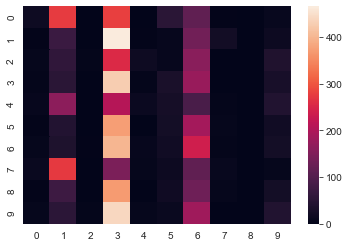

In [52]:
X=df[lst].fillna(value=0)
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("logistic_f2"+"num"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

### Working with DecisionTreeClassifier

We now use Decision Tree Classifier and follow the same steps that we did for other classifiers.

In [61]:
from sklearn.tree import DecisionTreeClassifier
to_probe=['comments','domain','text','title','url']

In [62]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', DecisionTreeClassifier()),  
])




 This is for comments 

[[258 174  35  61  16  31  26  60  28  37]
 [ 31 512  13  40   1  51  32  22  46   5]
 [ 24 146 329  16   2   6  12   8   6   3]
 [ 63 227  26 205  12  46  68  27  23  24]
 [  3 164   0   0 369   2   0   0   0   0]
 [ 36 216  14  41   6 213  73  18  39   9]
 [ 32 180  19  86   5  72 293  18  19  19]
 [ 40 150  14  20  12  18   6 369  11   6]
 [ 35 299  12  35   4  51  20  12 141  12]
 [ 32 234   9  26   7  11  22  15  10 356]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.47      0.36      0.40       726
  Business/Finance       0.22      0.68      0.34       753
              Food       0.70      0.60      0.64       552
     Non-Political       0.39      0.28      0.33       721
       Photography       0.85      0.69      0.76       538
    Policy/Economy       0.43      0.32      0.37       665
          Politics       0.53      0.39      0.45       743
         Scheduled       

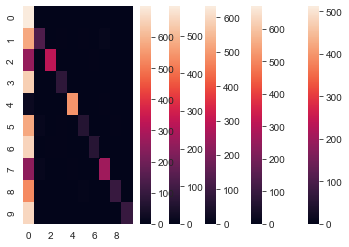

In [70]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("decisiontree_f2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    

Comments : accuracy= 0.45  
Domain   : accuracy= 0.35                     
Text     : accuracy= 0.31                                            
Title    : accuracy= 0.62                                               
url      : accuracy= 0.36 

Here too, title emerges as the best feature.
We now take a look at combined features.




 This is for 

[[319  20  22  69   6  16 221  18  32  12]
 [ 17 109   3   3   0  16 561   7  11   3]
 [ 26   0  88   7   1   4 446   0   0   3]
 [ 67   6  10  49   0  12 593   8   6   6]
 [  0   3   0   0 216   0 349   2   2   0]
 [ 24  18   1   9   0  51 522   5   9   3]
 [ 21   8   7   6   0  23 670   2   4   2]
 [  7  20   0   6   9   4 239 304   2   3]
 [ 29   6   1   8   3  15 465   2  63   4]
 [ 21   5   6  11   0   7 595   4   8  86]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.60      0.43      0.50       735
  Business/Finance       0.56      0.15      0.24       730
              Food       0.64      0.15      0.25       575
     Non-Political       0.29      0.06      0.11       757
       Photography       0.92      0.38      0.54       572
    Policy/Economy       0.34      0.08      0.13       642
          Politics       0.14      0.90      0.25       743
         Scheduled       0.86     

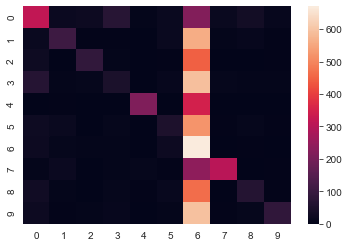

In [63]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    




 This is for 

[[291 170  29  64  26  25  33  31  41  30]
 [ 33 486  11  32  10  62  15   7  39  13]
 [ 35 158 327  15   2   3  14   6   2   5]
 [ 72 197  30 229   8  51  67  14  33  31]
 [  4 191   2   4 379   0   0   0   0   0]
 [ 43 209  16  51   2 206  64  12  39  20]
 [ 38 192  16  68   2  59 288  13  19  14]
 [ 23 130   3  19   9   6   4 420   8   2]
 [ 49 286   4  36   1  44  18   8 164  15]
 [ 31 230   3  42   0   9  19  11  12 383]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.47      0.39      0.43       740
  Business/Finance       0.22      0.69      0.33       708
              Food       0.74      0.58      0.65       567
     Non-Political       0.41      0.31      0.35       732
       Photography       0.86      0.65      0.74       580
    Policy/Economy       0.44      0.31      0.37       662
          Politics       0.55      0.41      0.47       709
         Scheduled       0.80     

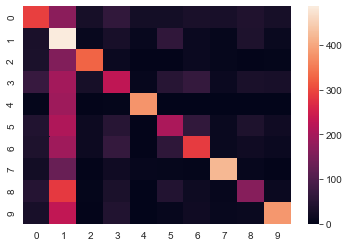

In [65]:
comb_feats=df['comments']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

No improvement.

So we take a look at the text length, title length and score, though we hardly expect them to do any better.

In [72]:
lst=['text_len','title_len','score']

In [73]:
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier()),  
])




 This is for 

[[258  55  50  82  45  35  38  46  49  65]
 [ 41 281  31  74  34  68  65  26  67  63]
 [ 37  59 250  40  13  34  41  13  22  29]
 [ 68 115  60 137  27  76  97  29  52  64]
 [  5  51  15  19 434  13   3   2  12   4]
 [ 48 131  55  79  21 113  81  18  59  63]
 [ 46 127  66  93  22  77 161  21  41  62]
 [ 29  49  21  28  21  29  18 368  26  28]
 [ 54 141  41  64  28  58  73  17 116  50]
 [ 59 133  74  97  32  61  83  24  51 136]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.40      0.36      0.38       723
  Business/Finance       0.25      0.37      0.30       750
              Food       0.38      0.46      0.42       538
     Non-Political       0.19      0.19      0.19       725
       Photography       0.64      0.78      0.70       558
    Policy/Economy       0.20      0.17      0.18       668
          Politics       0.24      0.22      0.23       716
         Scheduled       0.65     

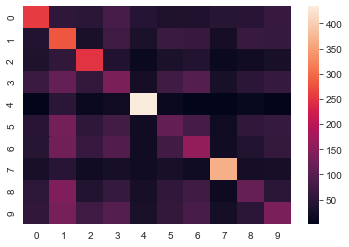

In [74]:
X=df[lst].fillna(value=0)
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("decisiontree_f2"+"num"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

### Working with Random Forest Classifier

We import the Random Forest Classifier and follow the previous steps like we did with other classifiers.

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
param_grid = {'n_estimators':[1,10,100,300,500]} 

In [68]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid,refit=True,verbose=2)),
])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   2.3s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.8s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 31.2min finished





 This is for comments 

[[497 130  22  10  15   6   6  16   5   9]
 [ 80 463   5  10   0  79  13  12  11   9]
 [ 36 144 352  12   4   6   5   6   1   5]
 [141 202   4 211   4  34  72  14  10  18]
 [  6 187   0   0 380   0   0   1   0   0]
 [ 83 156   2  20   1 322  54   4  14  11]
 [ 69 146  17  30   2  48 395   4   3   6]
 [106 133  12  16   5   8  10 373   1   8]
 [102 293   3  24   2  51  14   3 147  10]
 [ 63 205   2  13   3   7  14  11   6 402]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.42      0.69      0.52       716
  Business/Finance       0.22      0.68      0.34       682
              Food       0.84      0.62      0.71       571
     Non-Political       0.61      0.30      0.40       710
       Photography       0.91      0.66      0.77       574
    Policy/Economy       0.57      0.48      0.52       667
          Politics       0.68      0.55      0.61       720
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.5s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.5s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.5s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.5s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.5min finished





 This is for domain 

[[638   1   0   2   5   2   2   0  18  28]
 [145 166   3   8  22 176  62   0  88  33]
 [166   9  80  19  78  20  94   0  31  54]
 [176  26  30  71  51  38 169   0  94  99]
 [246   6  19  24 265   0  12   0   4  17]
 [ 88  36  12  12   6 280 171   1  46  33]
 [110   7  23  27  26  64 375   1  37  71]
 [472   1   5   2  15   3  43  32   7   7]
 [143  20  16   7  18  75  90   2 223  45]
 [142   9  29  26  25  27 171   1  50 258]]
AxesSubplot(0.125,0.125;0.496x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.27      0.92      0.42       696
  Business/Finance       0.59      0.24      0.34       703
              Food       0.37      0.15      0.21       551
     Non-Political       0.36      0.09      0.15       754
       Photography       0.52      0.45      0.48       593
    Policy/Economy       0.41      0.41      0.41       685
          Politics       0.32      0.51      0.39       741
         Scheduled       0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  7.2min finished





 This is for text 

[[505   0   1   1   2  78 141   6   0   0]
 [ 64  73   0   3   0  71 493   6   1   0]
 [ 60   0  85   0   0  39 376   0   0   0]
 [111   0   2  41   0  94 486   5   0   0]
 [ 14   0   0   0 225  38 283   0   0   0]
 [ 58   7   0   1   0 128 435   3   2   1]
 [ 52   0   3   1   0  73 622   1   0   0]
 [ 48  10   0   2  12  27 191 328   0   1]
 [ 78   6   0   1   0  68 413   1  70   1]
 [ 66   0   0   0   0  72 548   2   0  51]]
AxesSubplot(0.125,0.125;0.3968x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.48      0.69      0.56       734
  Business/Finance       0.76      0.10      0.18       711
              Food       0.93      0.15      0.26       560
     Non-Political       0.82      0.06      0.10       739
       Photography       0.94      0.40      0.56       560
    Policy/Economy       0.19      0.20      0.19       635
          Politics       0.16      0.83      0.26       752
         Scheduled       0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.4s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  8.5min finished





 This is for title 

[[456  58  12  53  14  29   6   7  38  18]
 [ 57 460   6  29   6  72  14  11  55  11]
 [ 30  27 470  11   6  11   8   3   5   5]
 [118  93  13 317  20  57  43   3  30  23]
 [  0   9   0   8 543   0   0   0   2   0]
 [ 56 103   8  43   4 344  72   2  34  11]
 [ 45  63  11  49  11  50 509   3  13  21]
 [ 14  22   0   8  12   8   6 515   4   2]
 [ 72  90   8  32   3  40  19   6 367  17]
 [ 30  37   5  25   4   3  13   2   4 600]]
AxesSubplot(0.125,0.125;0.31744x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.52      0.66      0.58       691
  Business/Finance       0.48      0.64      0.55       721
              Food       0.88      0.82      0.85       576
     Non-Political       0.55      0.44      0.49       717
       Photography       0.87      0.97      0.92       562
    Policy/Economy       0.56      0.51      0.53       677
          Politics       0.74      0.66      0.69       775
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   0.7s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.7s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.7s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.7s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   2.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   2.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   2.4s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 14.8min finished





 This is for url 

[[ 78   1   1   0   0   0 634   0   1   0]
 [  1 136   0   1   0   4 575  14   4   0]
 [  0   0 362   0   2   0 228   1   0   0]
 [  0   1   0  72   0   0 661   0   0   0]
 [  0   0   0   0 517   0  40   3   0   0]
 [  0   9   0   2   0  73 541   4   4   1]
 [  0   0   4   2   0   1 730   1   0   0]
 [  2   6   0   0   9   0 286 297   0   0]
 [  0   4   0   1   1   2 527   0 121   0]
 [  1   0   0   1   0   0 618   2   0 100]]
AxesSubplot(0.125,0.125;0.253952x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.95      0.11      0.20       715
  Business/Finance       0.87      0.19      0.30       735
              Food       0.99      0.61      0.75       593
     Non-Political       0.91      0.10      0.18       734
       Photography       0.98      0.92      0.95       560
    Policy/Economy       0.91      0.12      0.20       634
          Politics       0.15      0.99      0.26       738
         Scheduled       0

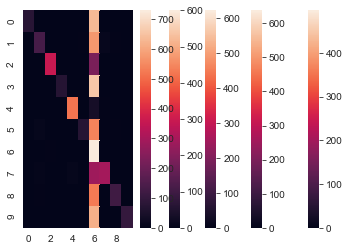

In [14]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("rforest_f2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    

Comments : accuracy= 0.52  
Domain   : accuracy= 0.35                     
Text     : accuracy= 0.31                                            
Title    : accuracy= 0.68                                               
url      : accuracy= 0.37

Here too, title outshines all features and now we move on to analyse the combined features.

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   3.1s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   1.7s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.8s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.8s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   3.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   3.6s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 28.6min finished





 This is for 

[[539   1   3  14   0   1 187   0   3   2]
 [ 48  77   0   2   0  35 546   2   2   0]
 [ 42   0  94   3   0   2 410   0   0   1]
 [ 88   1   2  41   0  16 544   7   1   3]
 [  6   0   0   0 190   0 367   2   0   0]
 [ 40  11   0   1   0  86 529   0   6   1]
 [ 61   0   3   7   0  23 638   0   0   1]
 [ 38   5   0   0   6   3 218 304   0   0]
 [ 82   3   0   2   0  37 492   0  58   0]
 [ 68   0   0   6   0   4 589   2   0  81]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.53      0.72      0.61       750
  Business/Finance       0.79      0.11      0.19       712
              Food       0.92      0.17      0.29       552
     Non-Political       0.54      0.06      0.11       703
       Photography       0.97      0.34      0.50       565
    Policy/Economy       0.42      0.13      0.20       674
          Politics       0.14      0.87      0.24       733
         Scheduled       0.96     

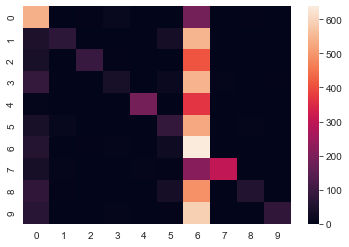

In [69]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   4.5s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   3.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   3.1s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   2.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   2.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   6.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   6.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   7.9s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 36.3min finished





 This is for 

[[514 106  14  14   5   5  16  13  11  13]
 [ 85 468   2   5   1  99  13   3  13   5]
 [ 50 144 346  16   0   8   7   0   0   0]
 [154 182   9 205   5  36  85  12   5  23]
 [  6 185   2   0 376   0   0   0   0   0]
 [ 76 168   3  10   1 311  74   3   7   4]
 [ 66 140   8  41   0  44 434   2   2   3]
 [ 35 102   5   4   9   3   6 436   1   4]
 [104 293   1  32   2  69  11   6 161   7]
 [ 44 218   1   6   1   3   8   3   1 453]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.45      0.72      0.56       711
  Business/Finance       0.23      0.67      0.35       694
              Food       0.88      0.61      0.72       571
     Non-Political       0.62      0.29      0.39       716
       Photography       0.94      0.66      0.78       569
    Policy/Economy       0.54      0.47      0.50       657
          Politics       0.66      0.59      0.62       740
         Scheduled       0.91     

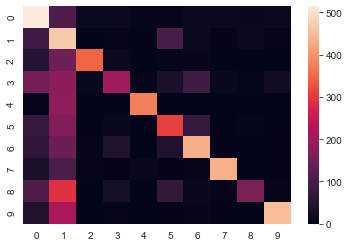

In [70]:
comb_feats=df['comments']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb2"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

The second type of combined features performed better than the first one.

Moving onto the lengths and score features.

In [77]:
lst=['text_len','title_len','score']

In [16]:
pipeline = Pipeline([
    ('classifier', GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid,refit=True,verbose=2)),  
])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   2.6s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.6s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.4s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.5s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.2s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   41.8s finished





 This is for 

[[356  60  31  50  32  36  24  44  38  46]
 [ 40 261  24  54  33  79  64  27  89  78]
 [ 38  70 238  34  30  33  39  17  33  36]
 [ 75  79  38 146  41  76  93  26  71 101]
 [ 11  46   8   6 419   3   9   4  17  12]
 [ 49 111  45  65  28 112  79  25  77  84]
 [ 42 104  37  61  37  81 155  24  63 106]
 [ 38  47  13  23  12   9  20 403  18  19]
 [ 52 128  40  50  18  75  61  24 128  60]
 [ 74 105  39  89  37  65  92  22  72 154]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.46      0.50      0.48       717
  Business/Finance       0.26      0.35      0.30       749
              Food       0.46      0.42      0.44       568
     Non-Political       0.25      0.20      0.22       746
       Photography       0.61      0.78      0.69       535
    Policy/Economy       0.20      0.17      0.18       675
          Politics       0.24      0.22      0.23       710
         Scheduled       0.65     

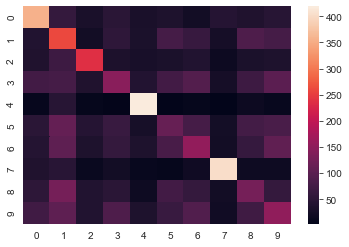

In [17]:
X=df[lst].fillna(value=0)
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("rforest_f2"+"num"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

At the end, we use the K Neighbors Classifer by following the same steps as above.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
param_grid = {'n_neighbors':[1,10,100,150,300,500,1000]} 

In [74]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_text)),  
    ('tfidf', TfidfTransformer()),  
    ('scaled',StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(KNeighborsClassifier(n_jobs=-1),param_grid,refit=True,verbose=2)),
])

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.6s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.6s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.5s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.6s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.5s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.7s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.7s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.8s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.0min finished





 This is for comments 

[[ 93   8   3   3   1   8   3   7 624   0]
 [  4 114   0   4   1  15   2   3 588   1]
 [  3   0 247   4   1  12   1   0 267   1]
 [  3   3   3  83   3   7   8   4 577   1]
 [  2   0   0   0 369   0   0   7 181   0]
 [  6  11   1   3   1  72   3   1 559   0]
 [  3   0   2   1   1   9  72   1 641   4]
 [  1   7   2   0   4   4   1 264 343   1]
 [  5   6   0   3   0  10   2   1 635   3]
 [  6   1   1   4   1  11   4   2 619  86]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.74      0.12      0.21       750
  Business/Finance       0.76      0.16      0.26       732
              Food       0.95      0.46      0.62       536
     Non-Political       0.79      0.12      0.21       692
       Photography       0.97      0.66      0.78       559
    Policy/Economy       0.49      0.11      0.18       657
          Politics       0.75      0.10      0.17       734
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   45.9s finished





 This is for domain 

[[731   1   3   3   1   0   1   0   4   2]
 [279 208  14  35  13  93  43   0  26  13]
 [261  18  96  12  46  24  63   0  31   6]
 [318  31  58  64  54  38 120   0  43  15]
 [269   0  38   2 202   3   7   0  15   0]
 [145 145  30  43   6 143 119   0  19  20]
 [203  10  50  44  24  69 274   0   9  28]
 [553   0  11   1  10  15  21  17   3   0]
 [298  42  20  17  11  39  58   2 117   3]
 [298  18  37  48  31  30 152   0  28 122]]
AxesSubplot(0.125,0.125;0.496x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.22      0.98      0.36       746
  Business/Finance       0.44      0.29      0.35       724
              Food       0.27      0.17      0.21       557
     Non-Political       0.24      0.09      0.13       741
       Photography       0.51      0.38      0.43       536
    Policy/Economy       0.31      0.21      0.25       670
          Politics       0.32      0.39      0.35       711
         Scheduled       0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   41.7s finished





 This is for text 

[[104  36   2 500   1   1   0   8  71   4]
 [  1  94   0 587   0   5   0   3  81   1]
 [  2  17  81 387   0   0   0   1  37   0]
 [  4  12   0 618   0   2   0   6  81   0]
 [  1  18   0 283 206   0   0   4  40   0]
 [  3  11   0 549   0   2   0   2 132   1]
 [  1  10   5 636   0   2  31   0  65   0]
 [  2  18   0 250   7   0   0 320  26   0]
 [  3  25   1 443   0   3   0   1 133   0]
 [  0  14   0 543   0   1   2   0  90  56]]
AxesSubplot(0.125,0.125;0.3968x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.86      0.14      0.25       727
  Business/Finance       0.37      0.12      0.18       772
              Food       0.91      0.15      0.26       525
     Non-Political       0.13      0.85      0.22       723
       Photography       0.96      0.37      0.54       552
    Policy/Economy       0.12      0.00      0.01       700
          Politics       0.94      0.04      0.08       750
         Scheduled       0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.3s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   45.0s finished





 This is for title 

[[233 245  21  56  18  23  42  24  49  24]
 [ 41 458   8  42   8  79  10  26  44  16]
 [ 19  78 429   8   3  15  12   3  11   7]
 [ 70 281  31 140  12  31  56  22  41  40]
 [  9  14   0   0 525   0   2   4   0   2]
 [ 40 288  12  39   4 176  51  14  30  25]
 [ 42 246  17  57   4  43 234  15  34  29]
 [ 12  59   3   7  12   5   5 457   6   1]
 [ 51 204  10  35   8  36  25  10 244  27]
 [ 28 205   7  28   4  20  31  14  15 386]]
AxesSubplot(0.125,0.125;0.31744x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.43      0.32      0.36       735
  Business/Finance       0.22      0.63      0.33       732
              Food       0.80      0.73      0.76       585
     Non-Political       0.34      0.19      0.25       724
       Photography       0.88      0.94      0.91       556
    Policy/Economy       0.41      0.26      0.32       679
          Politics       0.50      0.32      0.39       721
         Scheduled       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.2s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   42.7s finished





 This is for url 

[[ 81 643   0   0   2   2   0   0   1   2]
 [  1 733   0   3   0  11   0   5   3   0]
 [  1 234 310   0   0   0   1   0   0   0]
 [  0 606   0  89   0   0   2   0   2   0]
 [  0  36   0   0 511   0   0  12   0   0]
 [  0 598   0   0   0  62   1   0   7   1]
 [  0 670   5   4   0   2  86   0   0   0]
 [  1 276   0   0   5   0   2 306   0   0]
 [  0 524   0   1   0   6   1   0 106   0]
 [  0 629   0   0   0   0   0   0   0 103]]
AxesSubplot(0.125,0.125;0.253952x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.96      0.11      0.20       731
  Business/Finance       0.15      0.97      0.26       756
              Food       0.98      0.57      0.72       546
     Non-Political       0.92      0.13      0.22       699
       Photography       0.99      0.91      0.95       559
    Policy/Economy       0.75      0.09      0.16       669
          Politics       0.92      0.11      0.20       767
         Scheduled       0

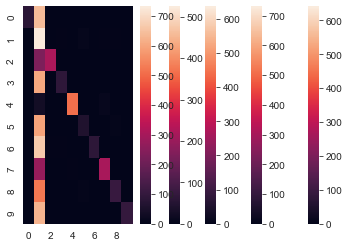

In [36]:
for x in to_probe:
    X=df[x].fillna(value='')
    y=df['flair']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    pipeline.fit(X_train,y_train)
    save_classifier=open("knn_ff2"+x+".pickle","wb")
    pickle.dump(pipeline,save_classifier)
    save_classifier.close()
    predictions = pipeline.predict(X_test)
    print('\n\n\n This is for',x,'\n')
    print(confusion_matrix(y_test,predictions))
    print(sns.heatmap(confusion_matrix(y_test,predictions)))
    print(classification_report(y_test,predictions))
    print('accuracy : ',accuracy_score(y_test,predictions))
    
    
    

Comments : accuracy= 0.30  
Domain   : accuracy= 0.29                     
Text     : accuracy= 0.24                                            
Title    : accuracy= 0.49                                               
url      : accuracy= 0.35
    
This does not give us results as good as other classifiers. We move on to take a look at combined features.

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   2.2s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   2.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   2.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   2.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   2.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.6s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.4s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.5s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished





 This is for 

[[ 81   0   2   1   0   1   0   0   3 672]
 [  2  80   0   0   1   4   1   7   1 657]
 [  0   0  80   1   0   0   2   0   0 458]
 [  0   1   0  29   1   0   0   0   0 708]
 [  0   0   0   0 195   0   0   6   0 352]
 [  2   3   0   1   0  24   0   2   2 642]
 [  0   0   2   0   0   1  30   0   0 714]
 [  0   8   0   0   8   1   0 204   0 384]
 [  0   3   0   0   0   3   0   1  50 556]
 [  0   0   0   0   0   1   0   1   0 698]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.95      0.11      0.19       760
  Business/Finance       0.84      0.11      0.19       753
              Food       0.95      0.15      0.26       541
     Non-Political       0.91      0.04      0.08       739
       Photography       0.95      0.35      0.51       553
    Policy/Economy       0.69      0.04      0.07       676
          Politics       0.91      0.04      0.08       747
         Scheduled       0.92     

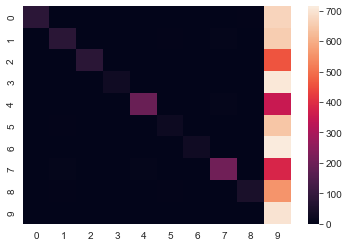

In [75]:
comb_feats=df['comments']+df['domain']+df['text']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.8s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   2.2s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   2.1s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished





 This is for 

[[ 90   3   0   0 645   4   0   2   0   1]
 [  0 114   1   3 607   9   0   4   3   0]
 [  2   0 234   0 277   0   5   1   0   0]
 [  4   0   1  77 630   2   4   0   1   1]
 [  2   0   0   0 562   0   0   1   0   0]
 [  1   9   1   1 622  52   1   1   7   2]
 [  2   2   4   2 663   2  86   3   0   0]
 [  2   6   0   0 323   0   0 260   2   0]
 [  0   6   0   0 539   7   0   0  97   1]
 [  0   0   2   1 589   1   2   0   1  97]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.87      0.12      0.21       745
  Business/Finance       0.81      0.15      0.26       741
              Food       0.96      0.45      0.61       519
     Non-Political       0.92      0.11      0.19       720
       Photography       0.10      0.99      0.19       565
    Policy/Economy       0.68      0.07      0.13       697
          Politics       0.88      0.11      0.20       764
         Scheduled       0.96     

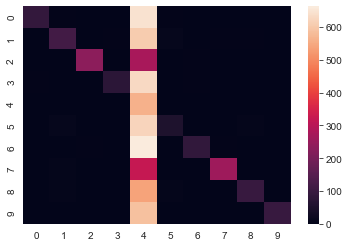

In [76]:
comb_feats=df['comments']+df['title']+df['url']
X=comb_feats.fillna(value='')
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("dtree_f2"+"comb"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

The heatmap gives us an idea of the inaccuracy. We now analyse the features left.

In [79]:
pipeline = Pipeline([
    ('scaled',StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(KNeighborsClassifier(n_jobs=-1),param_grid,refit=True,verbose=2)),
])

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   2.2s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.2s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.2s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.1s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.2s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   12.2s finished





 This is for 

[[285  54  42  65  31  40  41  39  71  55]
 [ 39 214  46  63  21  80  69  39  76  77]
 [ 30  40 252  45  18  44  45  15  38  33]
 [ 64  91  58 149  24  57  71  25  74  88]
 [ 12  35  15  26 393  19  12  18  21  15]
 [ 50  96  39  79  28 117  92  26  74  82]
 [ 36  96  49  87  22  90 175  31  72 130]
 [ 31  35  14  19  14  18  25 407  14  23]
 [ 38  89  51  63  23  83  57  21 137  66]
 [ 44  83  67  80  13  71  70  28  84 174]]
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

          AskIndia       0.45      0.39      0.42       723
  Business/Finance       0.26      0.30      0.27       724
              Food       0.40      0.45      0.42       560
     Non-Political       0.22      0.21      0.22       701
       Photography       0.67      0.69      0.68       566
    Policy/Economy       0.19      0.17      0.18       683
          Politics       0.27      0.22      0.24       788
         Scheduled       0.63     

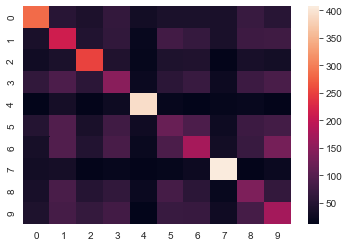

In [80]:
X=df[lst].fillna(value=0)
y=df['flair']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
pipeline.fit(X_train,y_train)
save_classifier=open("kneighbors_f2"+"num"+".pickle","wb")
pickle.dump(pipeline,save_classifier)
save_classifier.close()
predictions = pipeline.predict(X_test)
print('\n\n\n This is for','\n')
print(confusion_matrix(y_test,predictions))
print(sns.heatmap(confusion_matrix(y_test,predictions)))
print(classification_report(y_test,predictions))
print('accuracy : ',accuracy_score(y_test,predictions))
    

This gives a better result than the combined features, but still not satisfactory.

So, we see that the best result was given by using title with SVC and we'll be using that as our classifier.